In [1]:
import os

PATH = '/home/stadlerm/Development/Projects/DreamChallenge/RA2_alpine_lads'

os.chdir(PATH)

In [2]:
from utils.config import Config

config = Config()

In [3]:
from model.joint_detection import create_hand_joint_detector, create_foot_joint_detector

hand_detector = create_hand_joint_detector(config)

foot_detector = create_foot_joint_detector(config)

In [6]:
from prediction.joint_detection import dream_joint_detector

hand_dataset, feet_dataset = dream_joint_detector(config, hand_detector, foot_detector).create_dream_datasets('training_subset.csv')

coord_x          465.929
coord_y          579.883
erosion_0              0
erosion_1            NaN
image_name     UAB001-RH
key                pip_4
narrowing_0            2
narrowing_1          NaN
Name: 3, dtype: object


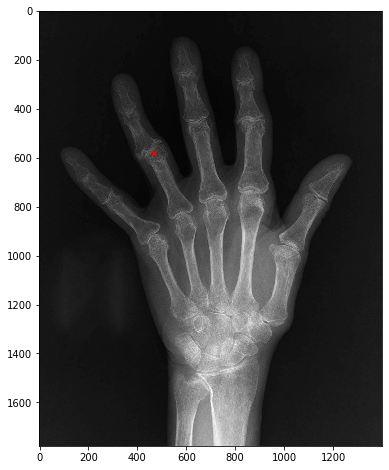

In [8]:
import dataset.ops.image_ops as img_ops
import matplotlib.pyplot as plt

vals = hand_dataset.iloc[3]

print(vals)

img, y = img_ops.load_image([vals['image_name'], 'jpg', 'Y'], [], config.train_location)

plt.figure(figsize = (8, 8))
plt.imshow(img[:, :, 0], cmap="gray")
plt.scatter(vals['coord_x'], vals['coord_y'], 20, c = 'red', marker = 'x')
plt.show()

coord_x          357.706
coord_y          663.756
erosion_0              0
image_name     UAB001-RF
key                mtp_4
narrowing_0            0
Name: 4, dtype: object


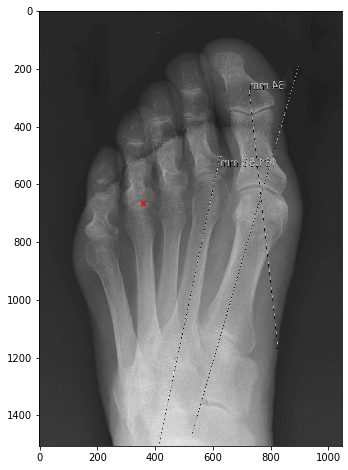

In [9]:
vals = feet_dataset.iloc[4]

print(vals)

img, y = img_ops.load_image([vals['image_name'], 'jpg', 'Y'], [], config.train_location)

plt.figure(figsize = (8, 8))
plt.imshow(img[:, :, 0], cmap="gray")
plt.scatter(vals['coord_x'], vals['coord_y'], 20, c = 'red', marker = 'x')
plt.show()

In [10]:
from prediction.joint_detection import rsna_joint_detector

rsna_dataset = rsna_joint_detector(config, hand_detector).create_rnsa_dataset()

boneage           135
coord_x       510.736
coord_y       493.962
image_name      10004
key             pip_4
sex                 1
Name: 3, dtype: object


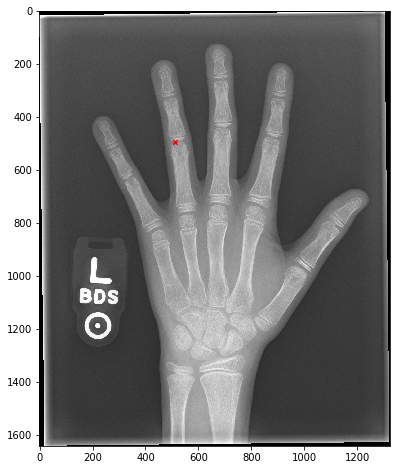

In [11]:
import dataset.ops.image_ops as img_ops
import matplotlib.pyplot as plt

vals = rsna_dataset.iloc[3]

print(vals)

img, y = img_ops.load_image([vals['image_name'], 'png', 'N'], [], '../rsna_boneAge/checked_rsna_training')

plt.figure(figsize = (8, 8))
plt.imshow(img[:, :, 0], cmap="gray")
plt.scatter(vals['coord_x'], vals['coord_y'], 20, c = 'red', marker = 'x')
plt.show()